In [1]:
# this script originally come from myeloid_fig
# this script plots umaps of all compartments

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
pd.set_option('display.max_rows', 200)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
#sc.logging.print_versions() #print version of package
sc.logging.print_header()
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120, color_map='viridis')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
adata_gex=sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_gex.h5ad')

In [3]:
adata_gex

AnnData object with n_obs × n_vars = 916806 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [3]:
tcell= pd.read_csv('/nfs/team205/ld21/renal/T_NK_compartment_annotation_updated.csv', index_col=0)

In [6]:
tcell.level_1.unique()

array(['T reg', 'T CD4+', 'NK', 'doublets', 'T CD8+', 'MAIT', 'T g/d'],
      dtype=object)

In [7]:
mcell = pd.read_csv('/nfs/team298/wt1/win/for_lisa/myeloid_progen_for_Lisa.csv', index_col=0)

In [8]:
mcell.shape

(126622, 37)

In [9]:
bcell = pd.read_csv('/nfs/team298/wt1/win/for_lisa/imperial_renal_B_updated_annotations_230622.csv', index_col=0)

In [10]:
bcell.celltype_B_corrected_group.unique()

array(['B', 'B_ASC'], dtype=object)

In [11]:
bcell.head()

celltype_B_corrected_group  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1                          B   
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1                          B   
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1                          B   
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1                          B   
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1                          B   

                                                 celltype_B_corrected  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1       B_switched_mem   
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1       B_ASC_dividing   
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1       B_switched_mem   
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1       B_switched_mem   
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1       B_ASC_dividing   

                                                 celltype_B_corrected_IFN  
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1       B_switched_mem_Low  
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1       B_ASC_dividing_Low  
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1       B_switched_mem_Low  
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1       B_switched_mem_Low  
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1       B_ASC_dividing_Low

In [12]:
len(tcell.index)+len(bcell.index)+len(mcell.index)

764381

In [13]:
adata = adata_gex[(adata_gex.obs.index.isin(tcell.index))|(adata_gex.obs.index.isin(bcell.index))|(adata_gex.obs.index.isin(mcell.index))]

In [14]:
adata

View of AnnData object with n_obs × n_vars = 764381 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_

In [15]:
adata.obs['final_anno']='uk'
adata.obs['final_anno']=adata.obs['final_anno'].astype('object')

/tmp/ipykernel_193/501034239.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['final_anno']='uk'


In [16]:
bcell.head()

celltype_B_corrected_group  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1                          B   
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1                          B   
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1                          B   
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1                          B   
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1                          B   

                                                 celltype_B_corrected  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1       B_switched_mem   
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1       B_ASC_dividing   
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1       B_switched_mem   
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1       B_switched_mem   
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1       B_ASC_dividing   

                                                 celltype_B_corrected_IFN  
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1       B_switched_mem_Low  
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1       B_ASC_dividing_Low  
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1       B_switched_mem_Low  
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1       B_switched_mem_Low  
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1       B_ASC_dividing_Low

In [17]:
adata.obs['final_anno'].update(pd.Series(tcell['level_1'].astype('object')))

In [18]:
adata.obs['final_anno'].update(pd.Series(bcell['celltype_B_corrected_group'].astype('object')))

In [19]:
adata.obs['final_anno'].update(pd.Series(mcell['annot2'].astype('object')))

In [20]:
list(adata.obs['final_anno'].unique())

['B',
 'CD14mono',
 'T reg',
 'T CD4+',
 'CD16mono',
 'pDC',
 'NK',
 'doublets',
 'T CD8+',
 'Int.mono',
 'RBC',
 'DC2',
 'MAIT',
 'T g/d',
 'B_ASC',
 'Platelet',
 'HSPC',
 'DC3',
 'DC1',
 'ASDC']

In [21]:
adata.obs['final_anno'] = adata.obs['final_anno'].str.replace('CD14mono_activated','CD14mono')


In [22]:
adata.obs['final_anno'] = adata.obs['final_anno'].str.replace('CD14mono_anti_inflammatory','CD14mono_alt_act')

In [23]:
list(adata.obs['final_anno'].unique())

['B',
 'CD14mono',
 'T reg',
 'T CD4+',
 'CD16mono',
 'pDC',
 'NK',
 'doublets',
 'T CD8+',
 'Int.mono',
 'RBC',
 'DC2',
 'MAIT',
 'T g/d',
 'B_ASC',
 'Platelet',
 'HSPC',
 'DC3',
 'DC1',
 'ASDC']

In [24]:
adata=adata[~adata.obs['final_anno'].isin(['doublets'])]

In [25]:
list(adata.obs['final_anno'].unique())

['B',
 'CD14mono',
 'T reg',
 'T CD4+',
 'CD16mono',
 'pDC',
 'NK',
 'T CD8+',
 'Int.mono',
 'RBC',
 'DC2',
 'MAIT',
 'T g/d',
 'B_ASC',
 'Platelet',
 'HSPC',
 'DC3',
 'DC1',
 'ASDC']

In [26]:
adata.obs['centre'].unique()

['NCL', 'Cambridge']
Categories (2, object): ['Cambridge', 'NCL']

In [27]:
adata.obs['case_control'].unique()

['NA', 'NEGATIVE', 'POSITIVE', 'RECOVERY']
Categories (4, object): ['NA', 'NEGATIVE', 'POSITIVE', 'RECOVERY']

In [28]:
adata.obsm['X_umap'] = adata.obsm['X_umapafterharmony_rna']

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


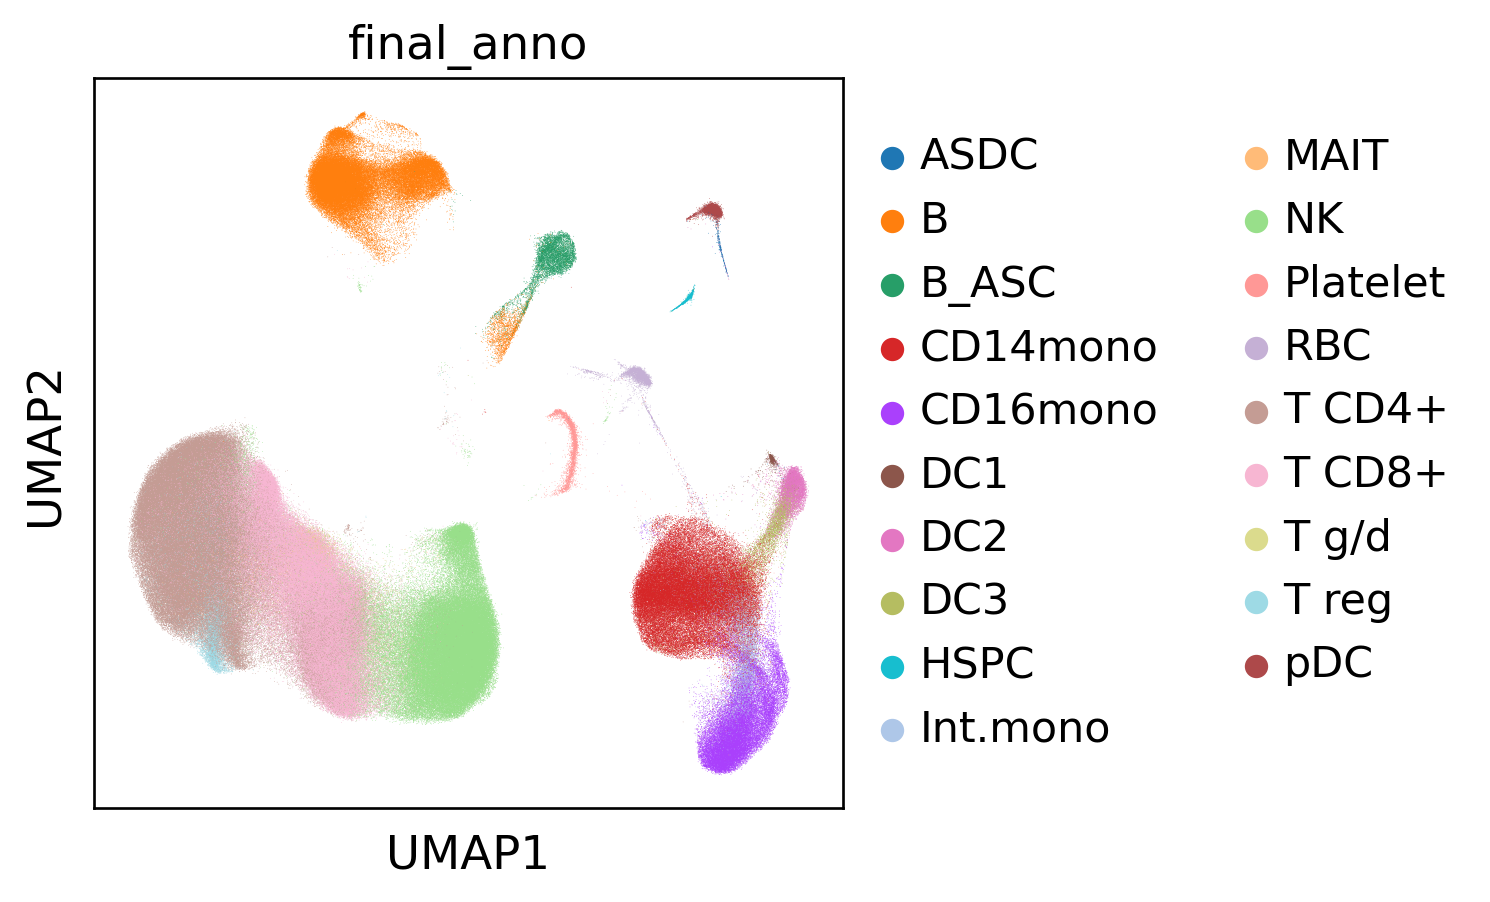

In [29]:
sc.pl.umap(adata,color='final_anno')

In [30]:
adata.obs['final_anno'].cat.reorder_categories(['CD14mono','CD16mono','Int.mono','DC1','DC2','DC3','ASDC','pDC','Platelet','RBC','HSPC',
           'MAIT','NK', 'T CD4+','T CD8+','T g/d', 'T reg',  'B_ASC','B'], inplace=True)

/tmp/ipykernel_193/861426642.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['final_anno'].cat.reorder_categories(['CD14mono','CD16mono','Int.mono','DC1','DC2','DC3','ASDC','pDC','Platelet','RBC','HSPC',


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


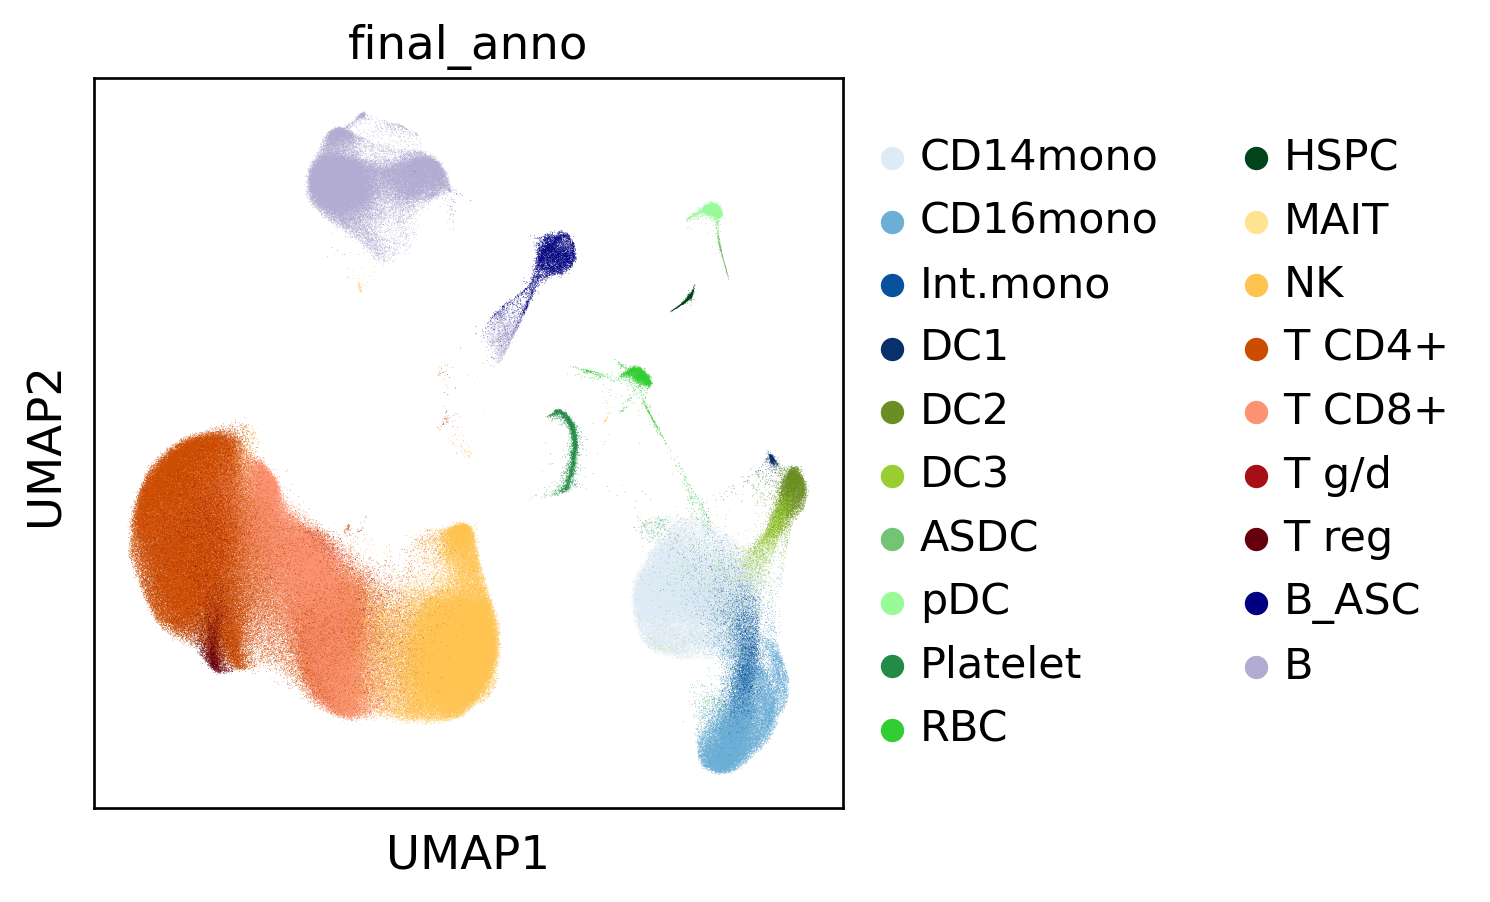

In [31]:
sc.pl.umap(adata,color='final_anno',palette={'CD14mono':'#DEEBF7','CD16mono':'#6BAED6',
         'Int.mono':'#08519C',
        'DC1':'#08306B',
        'DC2':'olivedrab',
        'DC3':'yellowgreen',
         'ASDC':'#74C476',
        'pDC':'palegreen',
        'Platelet':'#238B45',
        'RBC':'limegreen',
        'HSPC':'#00441B',
        'MAIT':'#FEE391',
        'NK':'#FEC44F',
         'T CD4+':'#CC4C02',
        'T CD8+':'#FC9272',
        'T g/d':'#A50F15',
        'T reg':'#67000D',
        'B_ASC':'navy',
        'B':'#B2ABD2'
})

In [32]:
adata.obs['case_control'].unique()

['NA', 'NEGATIVE', 'POSITIVE', 'RECOVERY']
Categories (4, object): ['NA', 'NEGATIVE', 'POSITIVE', 'RECOVERY']

# wave 1 and wave 2 plots

In [33]:
adata = adata[adata.obs['case_control']!='NA']

In [34]:
adata.obs['case_control'].unique()

['NEGATIVE', 'POSITIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [35]:
wave1 = adata[adata.obs['centre']=='NCL']

In [36]:
wave2 = adata[adata.obs['centre']=='Cambridge']

/home/jovyan/.local/lib/python3.8/site-packages/anndata-0.8.0-py3.8.egg/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


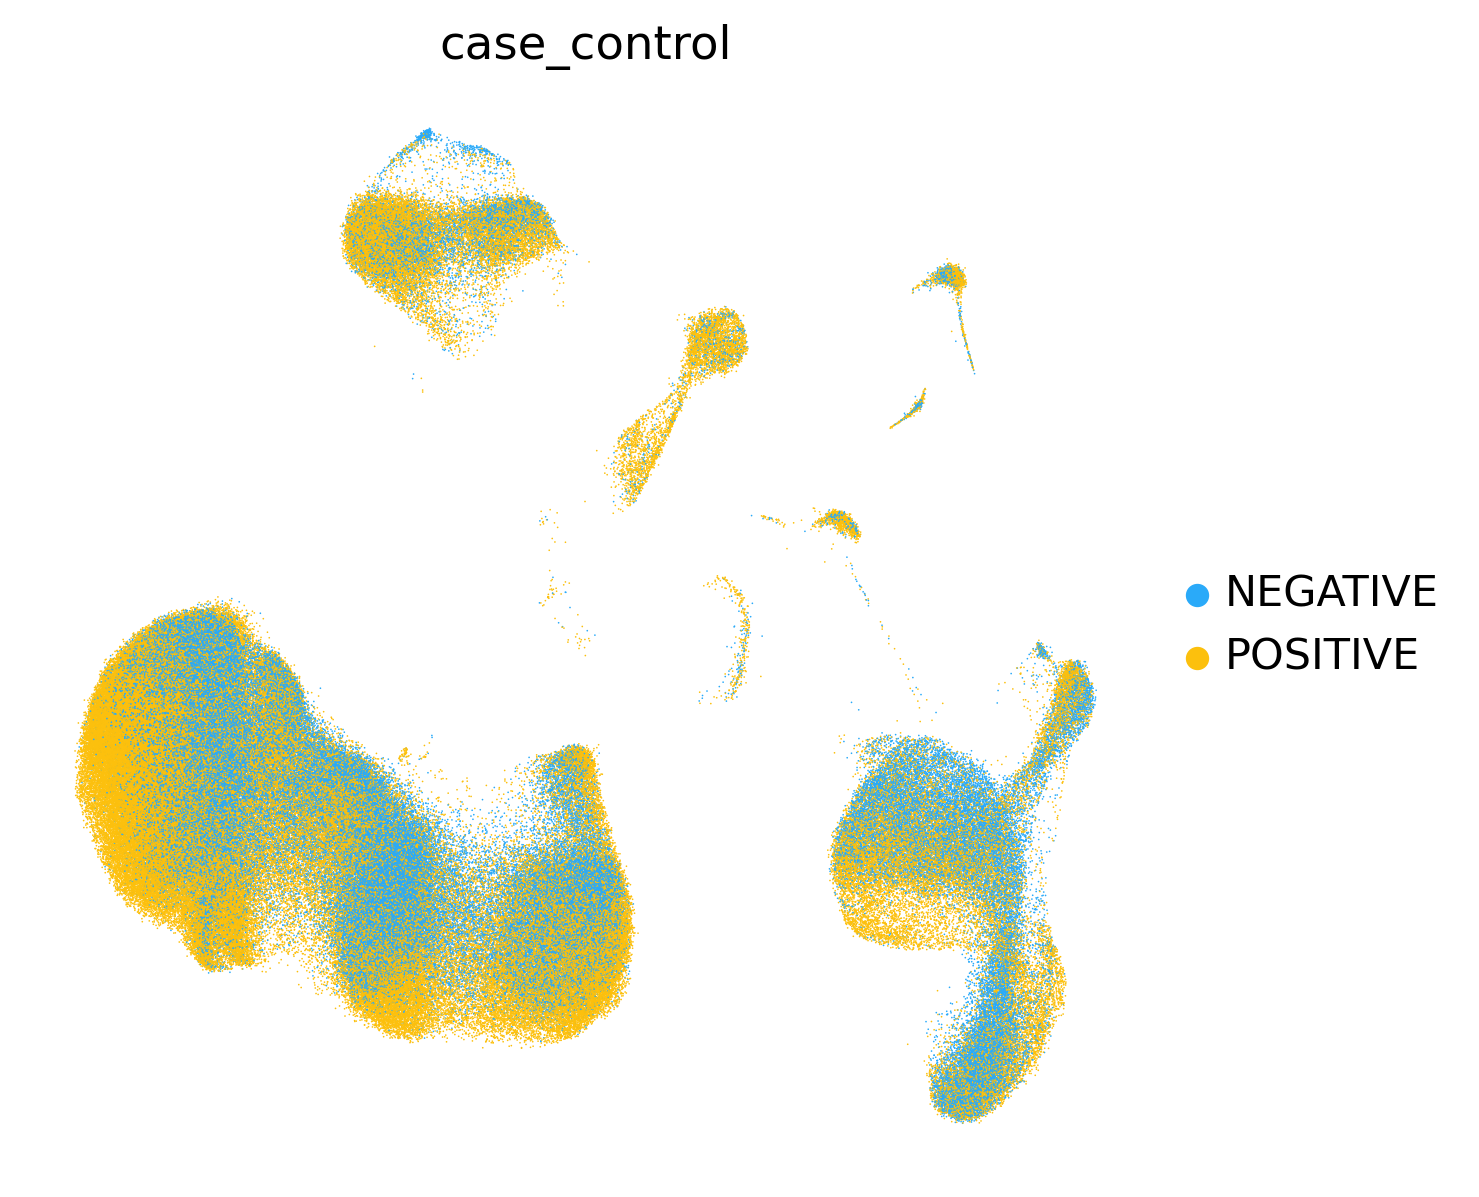

In [37]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(wave1,color='case_control',size=1,palette={'NEGATIVE': '#2AAAF9','POSITIVE':'#FCC00D'},frameon=False,save='wave1_cc.pdf')

In [38]:
wave1.obs['WHO_severity'].unique()

['NA', 'critical', 'severe', 'moderate', 'mild']
Categories (5, object): ['NA', 'critical', 'mild', 'moderate', 'severe']

In [39]:
wave1.obs['case_control'].unique()

['NEGATIVE', 'POSITIVE']
Categories (2, object): ['NEGATIVE', 'POSITIVE']

/tmp/ipykernel_193/3970672216.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  wave1.obs['WHO_severity'].cat.reorder_categories(['NA', 'mild', 'moderate', 'severe','critical'], inplace=True)


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


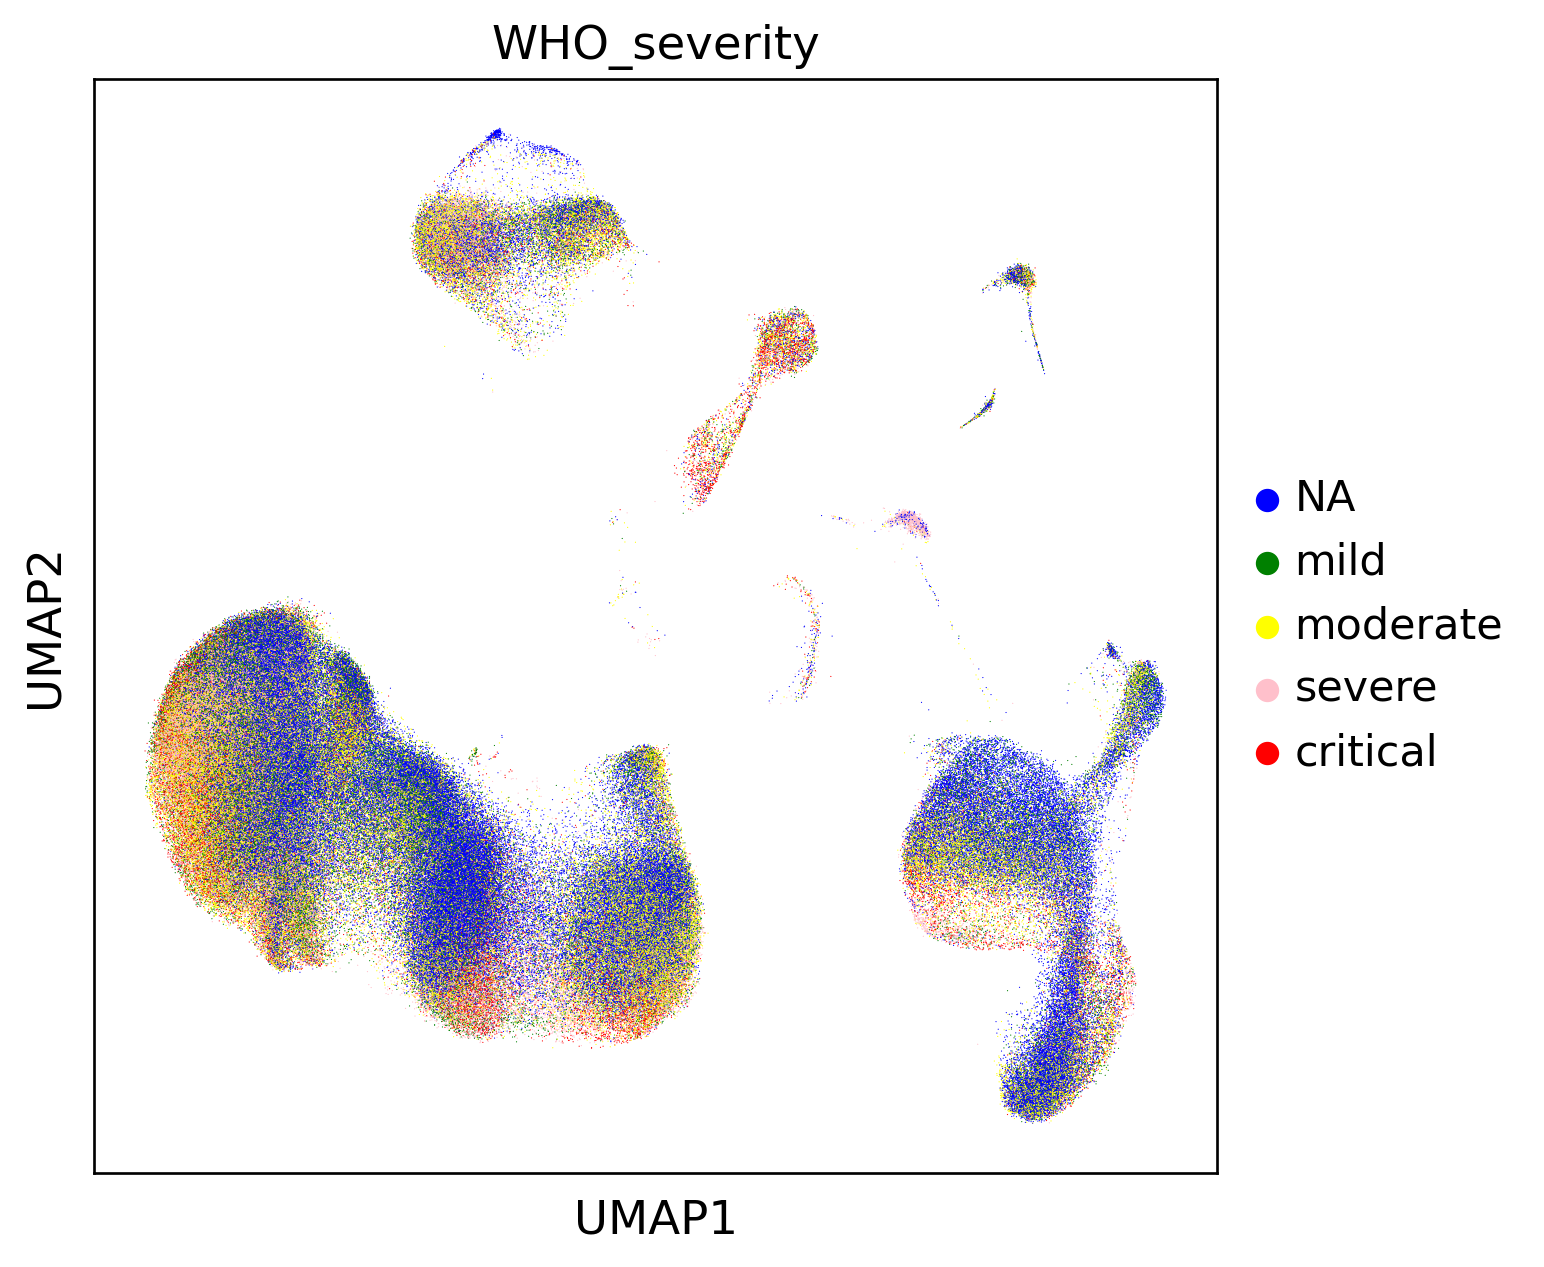

In [40]:
wave1.obs['WHO_severity'].cat.reorder_categories(['NA', 'mild', 'moderate', 'severe','critical'], inplace=True)
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(wave1,color='WHO_severity',size=0.5,palette={'NA': 'blue',
'mild':'green',
'moderate':'yellow',
'severe':'pink',
'critical':'red'
}, save='wave1_sev.pdf')
#'NA' is negative in wave1

In [41]:
wave2.obs['case_control'].unique()

['POSITIVE', 'NEGATIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

/home/jovyan/.local/lib/python3.8/site-packages/anndata-0.8.0-py3.8.egg/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


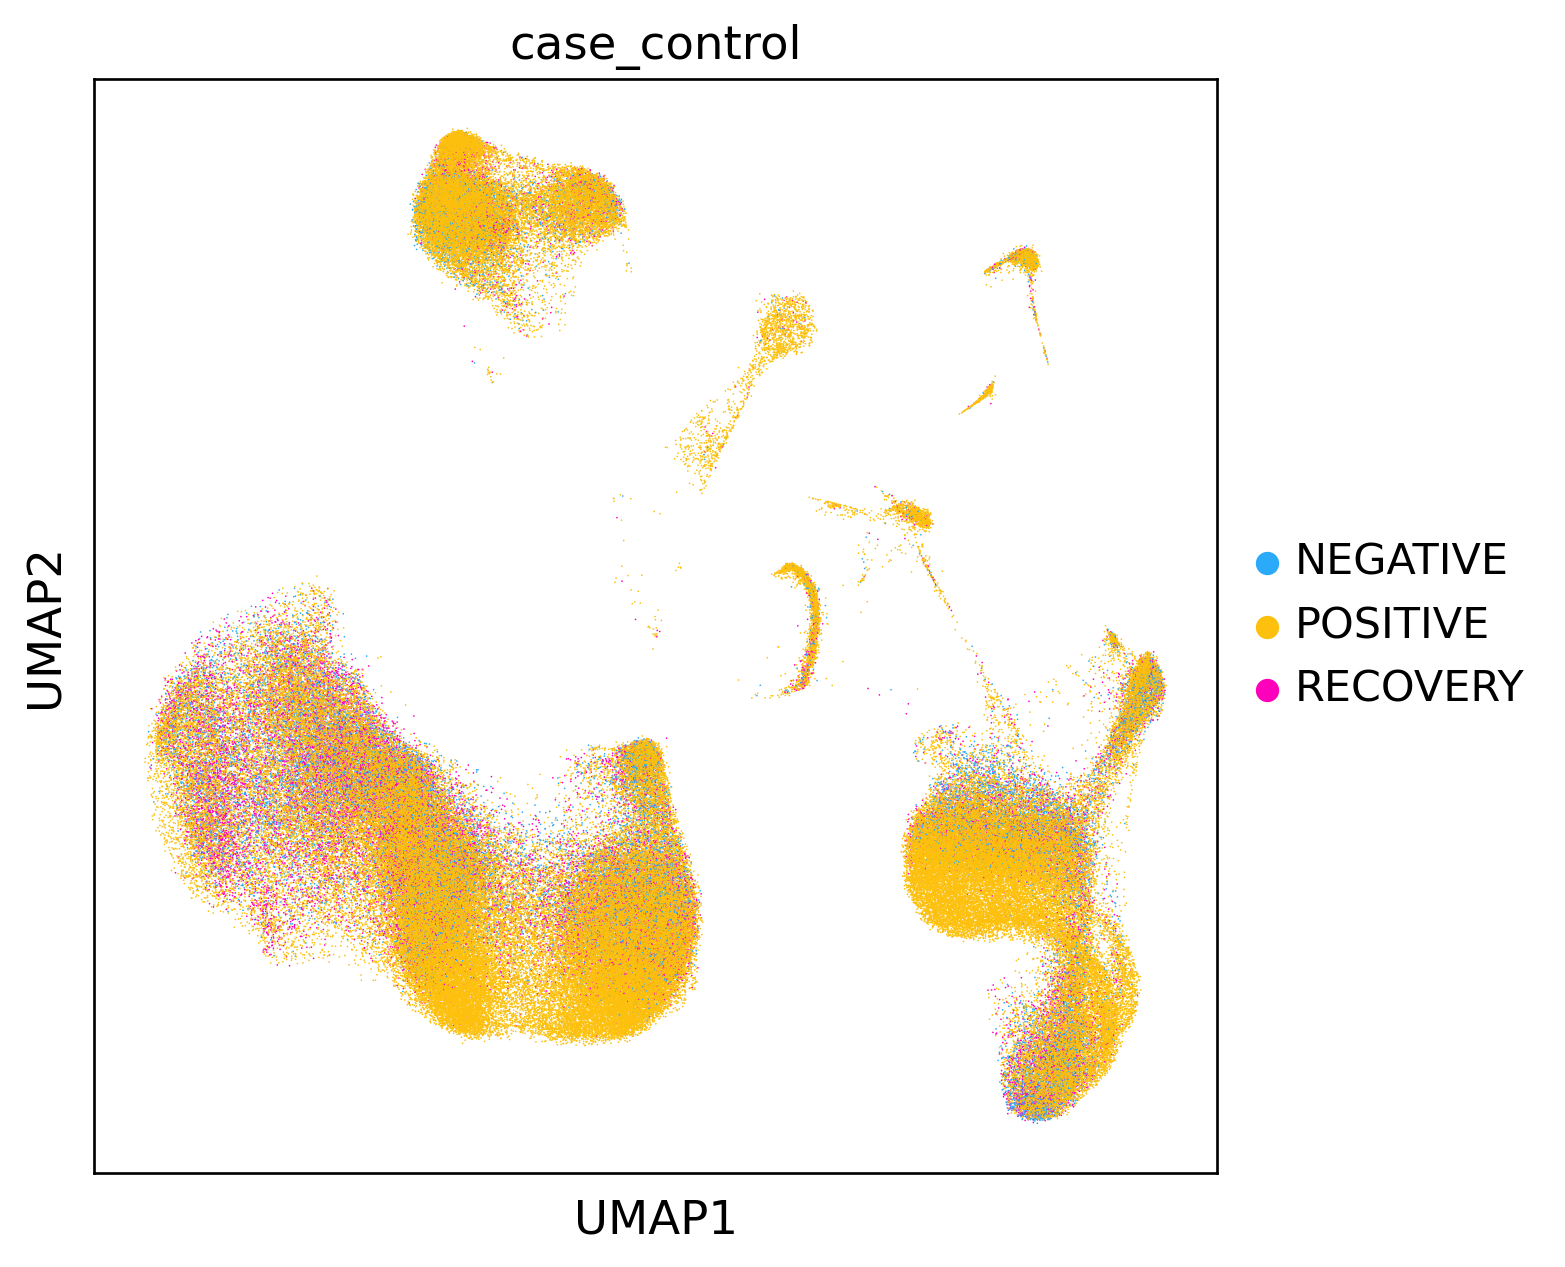

In [42]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(wave2,color='case_control',size=1,palette={'NEGATIVE': '#2AAAF9','POSITIVE':'#FCC00D',
                                                           'RECOVERY':'#FE00BB'},save='wave2_cc.pdf')

In [43]:
wave2.obs['WHO_severity'].unique()
#NA is negative and recovery in wave2

['severe', 'mild', 'NA', 'moderate', 'critical']
Categories (5, object): ['NA', 'critical', 'mild', 'moderate', 'severe']

/tmp/ipykernel_193/1706759960.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  wave2.obs['WHO_severity'].cat.reorder_categories(['NA', 'mild', 'moderate', 'severe','critical'], inplace=True)


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


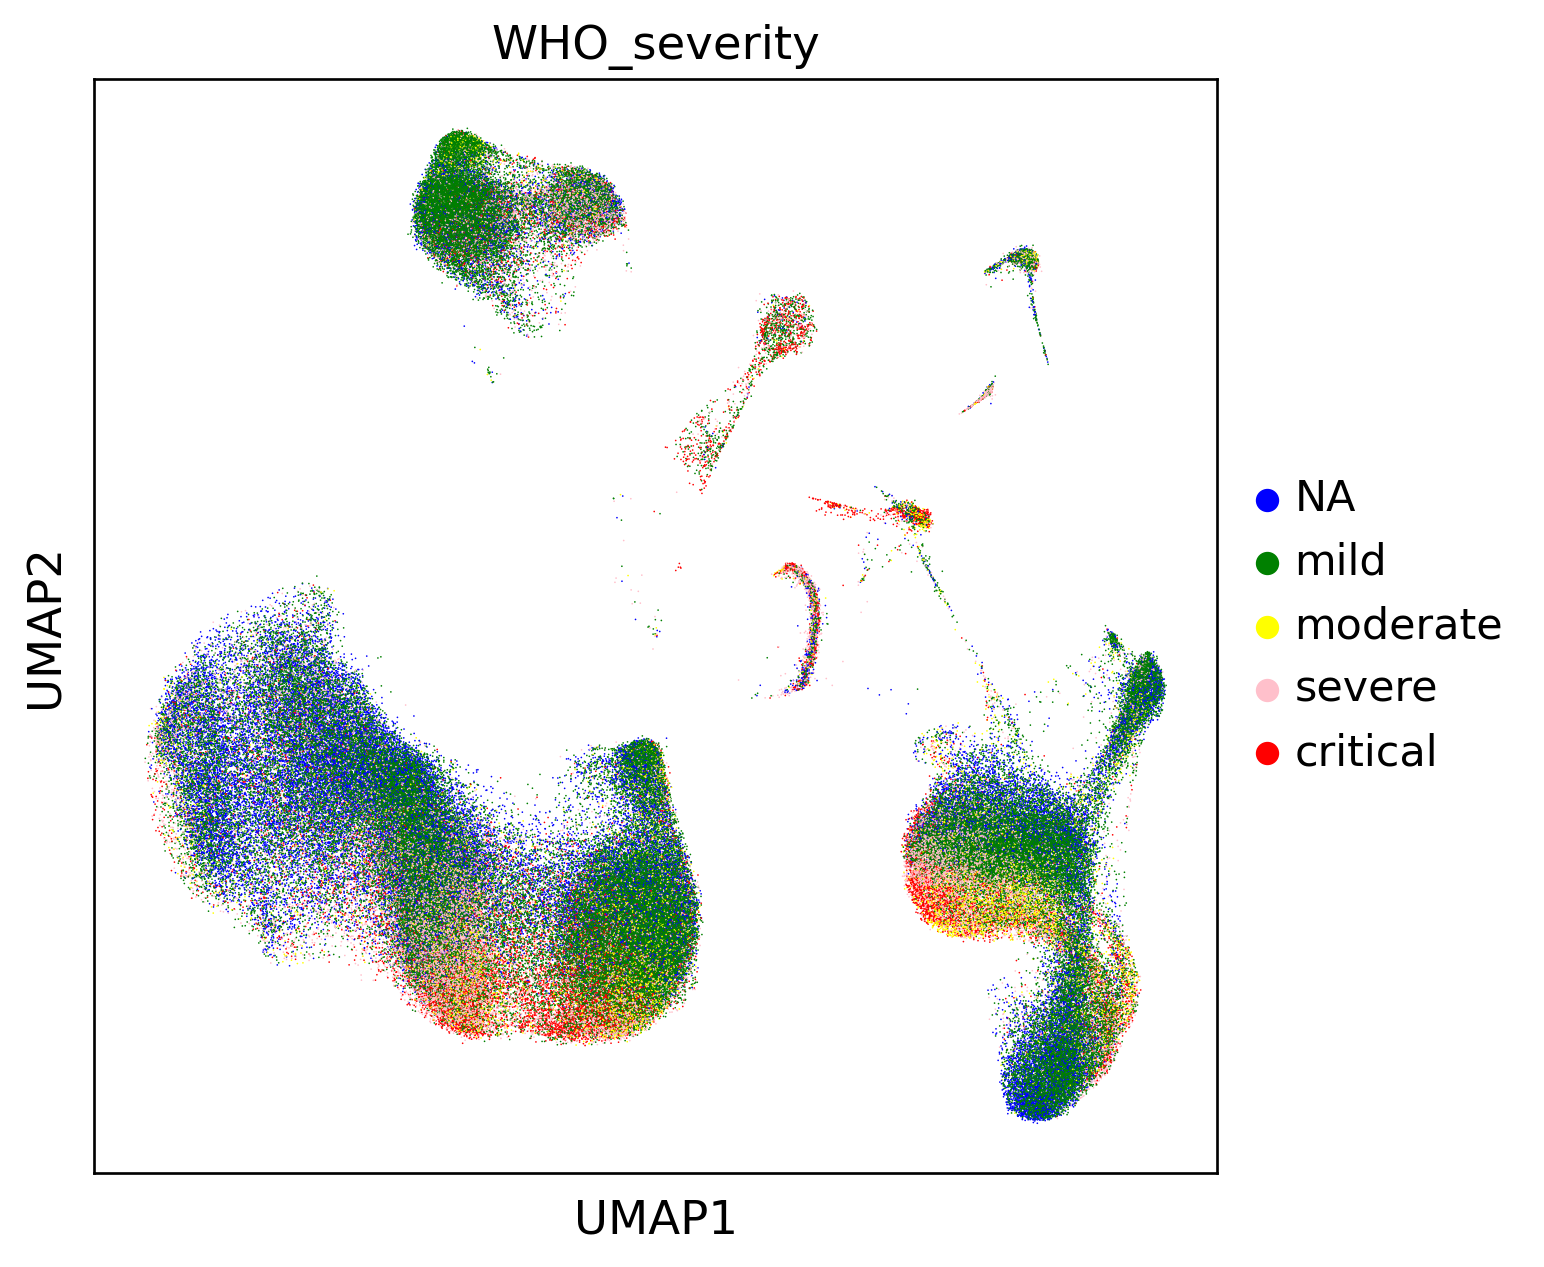

In [44]:
wave2.obs['WHO_severity'].cat.reorder_categories(['NA', 'mild', 'moderate', 'severe','critical'], inplace=True)
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(wave2,color='WHO_severity',size=1,palette={'NA': 'blue',
'mild':'green',
'moderate':'yellow',
'severe':'pink',
'critical':'red'
},save='wave2_sev.pdf')

# scritps to plot with numbers

In [ ]:
 %pylab
def plot_embedding(
        adata, groupby, basis='umap', color=None, annot=True, min_group_size=0,
        highlight=None, size=None, save=None, savedpi=300, figsize=(4,4), **kwargs):
  with rc_context({'figure.figsize': (8, 8)}): 
    if f'X_{basis}' not in adata.obsm.keys():
        raise KeyError(f'"X_{basis}" not found in `adata.obsm`.')
    if min_group_size:
        group_sizes = adata.obs[groupby].value_counts()
        good_groups = group_sizes[group_sizes >= min_group_size].index
        adata = adata[adata.obs[groupby].isin(good_groups)].copy()
    if isinstance(groupby, (list, tuple)):
        groupby = groupby[0]
    if groupby not in adata.obs.columns:
        raise KeyError(f'"{groupby}" not found in `adata.obs`.')
    if adata.obs[groupby].dtype.name != 'category':
        if isinstance(adata.obs[groupby][0], (str, bool, np.bool_)) and adata.obs[groupby].unique().size < 100:
            adata.obs[groupby] = adata.obs[groupby].astype(str).astype('category')
        else:
            sc_warn(f'"{groupby}" is not categorical.')
            plot_scatter(adata, basis=basis, color=groupby, **kwargs)
    groups = adata.obs[groupby].copy()
    categories = list(adata.obs[groupby].cat.categories)
    rename_dict1 = {ct: f'{i:^5d} {ct} (n={(adata.obs[groupby]==ct).sum()})' for i, ct in enumerate(categories)}
    restore_dict1 = {f'{i:^5d} {ct} (n={(adata.obs[groupby]==ct).sum()})': ct for i, ct in enumerate(categories)}
    rename_dict2 = {ct: f'{i:^5d} {ct}' for i, ct in enumerate(categories)}
    restore_dict2 = {f'{i:^5d} {ct}': ct for i, ct in enumerate(categories)}

    size_ratio = 1.2

    ad = adata
    marker_size = size
    kwargs['show'] = False
    kwargs['save'] = False
    kwargs['frameon'] = kwargs.get('frameon', None)
    kwargs['legend_loc'] = 'right margin'

    color = groupby if color is None else color
    offset = 0 if 'diffmap' in basis else -1
    xi, yi = 1, 2
    if 'components' in kwargs:
        xi, yi = components
    xi += offset
    yi += offset

    adata.uns[f'{color}_colors'] = make_palette(adata.obs[color].cat.categories.size, kwargs.get('palette', None))

    if highlight:
        k_nohl = np.where(~adata.obs[groupby].cat.categories.isin(highlight))[0]
        for k in k_nohl:
            ad.uns[f'{color}_colors'][k] = ad.uns[f'{color}_colors'][k] + '05'

    if annot == 'full':
        adata.obs[groupby].cat.rename_categories(rename_dict1, inplace=True)
        if highlight:
            ad.obs[groupby].cat.rename_categories(rename_dict1, inplace=True)
    elif annot in (None, False, 'none'):
        kwargs['title'] = ''
        kwargs['legend_loc'] = None
    else:
        adata.obs[groupby].cat.rename_categories(rename_dict2, inplace=True)
        if highlight:
            ad.obs[groupby].cat.rename_categories(rename_dict2, inplace=True)

    try:
        ax = plot_scatter(ad, basis=basis, color=color, size=marker_size, **kwargs)
    finally:
        if annot == 'full':
            adata.obs[groupby].cat.rename_categories(restore_dict1, inplace=True)
        elif annot not in (None, False, 'none'):
            adata.obs[groupby].cat.rename_categories(restore_dict2, inplace=True)
    if annot not in (None, False, 'none'):
        centroids = pseudo_bulk(adata, groupby, use_rep=f'X_{basis}', FUN=np.median).T
        fontsize = kwargs['legend_fontsize'] if 'legend_fontsize' in kwargs else 16
        texts = [ax.text(x=row[xi], y=row[yi], s=f'{i:d}', fontsize=fontsize-1.5, fontweight='bold') for i, row in centroids.reset_index(drop=True).iterrows() if row[0].astype(str) != 'nan']
        from adjustText import adjust_text
        adjust_text(texts, ax=ax, text_from_points=False, autoalign=False)
        version_scale = 1 if sc.__version__.startswith('1.4') else 1
        ax.legend(
            loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False, ncol=int(np.ceil(len(categories)/int(figsize[1]*3)/8*fontsize)),
            fontsize=fontsize*1.1, markerscale=3*(fontsize/11)*version_scale, handletextpad=-1.3, labelspacing=9/fontsize #1.9
        )
    if save:
        plt.savefig(fname=save, dpi=savedpi, bbox_inches='tight', pad_inches=0.1)
    if 'ax' not in kwargs.keys():
        return ax

In [ ]:
def make_palette(n, cmap=None, hide_first=False, hide_last=False, hide_color='#E9E9E910'):
    """Returns a color palette with specified number of colors
    """
    i = int(hide_first)
    j = int(hide_last)
    if cmap is None:
        if sc.__version__.startswith('1.4'):
            sc_default_10 = rcParams['axes.prop_cycle'].by_key()['color']
            sc_default_26 = sc.plotting.palettes.default_26
            sc_default_64 = sc.plotting.palettes.default_64
            palette = (sc_default_10[0:(n-i-j)] if n <= 10 + i + j else
                    sc_default_10 + sc_default_26[0:(n-i-j)] if n <= 36 + i + j else
                    sc_default_10 + sc_default_26 + sc_default_64[0:(n-i-j)] if n <= 100 + i + j else
                    ['grey'] * n)
        else:
            sc_default_20 = sc.plotting.palettes.default_20
            sc_default_28 = sc.plotting.palettes.default_28
            sc_default_102 = sc.plotting.palettes.default_102
            palette = (sc_default_20[0:(n-i-j)] if n <= 20 + i + j else
                    sc_default_20 + sc_default_28[0:(n-i-j)] if n <= 48 + i + j else
                    sc_default_102[0:(n-i-j)] if n<= 102 + i + j else
                    ['grey'] * n)
    else:
        color_map = plt.get_cmap(cmap)
        palette = [to_hex(color_map(k)) for k in range(n-i-j)]

    if hide_first:
        palette.insert(0, hide_color)
    if hide_last:
        palette.append(hide_color)
    print (palette)
    palette = ['#DEEBF7',
        
        '#6BAED6',
       
        '#08519C',
        '#08306B',
       'olivedrab',
        'yellowgreen',
       
        '#74C476',
        'palegreen',
       '#238B45',
        'limegreen',
        '#00441B',
     
       '#FEE391',
       '#FEC44F',
      
        '#CC4C02',

       '#FC9272',
      
     '#A50F15',
        '#67000D',
        'navy',
       
        '#B2ABD2',]
   # palette =['#DEEBF7','#C6DBEF','#9ECAE1','#6BAED6','#4292C6','#2171B5','#08519C','#08306B',
           #'olivedrab','yellowgreen','chartreuse','#74C476','palegreen','#238B45','limegreen','#00441B']
    return palette

In [ ]:
def pseudo_bulk(
        adata, groupby, use_rep='X', highly_variable=False, FUN=np.mean):
    """Make pseudo bulk data from grouped sc data
    """
    if adata.obs[groupby].dtype.name == 'category':
        group_attr = adata.obs[groupby].values
        groups = adata.obs[groupby].cat.categories.values
    else:
        group_attr = adata.obs[groupby].astype(str).values
        groups = np.unique(group_attr)
    n_level = len(groups)
    if highly_variable:
        if isinstance(highly_variable, (list, tuple)):
            if use_rep == 'raw':
                k_hv = adata.raw.var_names.isin(highly_variable)
            else:
                k_hv = adata.var_names.isin(highly_variable)
        else:
            k_hv = adata.var['highly_variable'].values
    if use_rep == 'X':
        x = adata.X
        features = adata.var_names.values
        if highly_variable:
            x = x[:, k_hv]
            features = features[k_hv]
    elif use_rep == 'raw':
        x = adata.raw.X
        features = adata.raw.var_names.values
        if highly_variable:
            x = x[:, k_hv]
            features = features[k_hv]
    elif use_rep in adata.layers.keys():
        x = adata.layers[use_rep]
        features = adata.var_names.values
        if highly_variable:
            x = x[:, k_hv]
            features = features[k_hv]
    elif use_rep in adata.obsm.keys():
        x = adata.obsm[use_rep]
        features = np.arange(x.shape[1])
    elif (isinstance(use_rep, np.ndarray) and
            use_rep.shape[0] == adata.shape[0]):
        x = use_rep
        features = np.arange(x.shape[1])
    else:
        raise KeyError(f'{use_rep} invalid.')
    summarised = np.zeros((n_level, x.shape[1]))
    for i, grp in enumerate(groups):
        k_grp = group_attr == grp
        if sp.issparse(x):
            summarised[i] = FUN(x[k_grp, :], axis=0)
        else:
            summarised[i] = FUN(x[k_grp, :], axis=0, keepdims=True)
    return pd.DataFrame(summarised.T, columns=groups, index=features)

In [ ]:
if sc.__version__.startswith('1.4'):
    from scanpy.plotting._tools.scatterplots import plot_scatter
else:
    plot_scatter = sc.pl.embedding

In [ ]:
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import scipy.sparse as sp
from matplotlib.pyplot import rc_context
plot_embedding(adata, 'final_anno',size=1,save='all_comp.pdf')